# Classical Machine Learning Project - Predicting the Success of Spotify Songs

Name: Adison Goh

In order to predict whether a song will be popular (successful), a rule-based deterministic solution is difficult as there are many factors that may influence the popularity of songs (eg. the artist, danceability, tempo, genre). Furthermore, it is not apparent on the extent of influence each factor may have on the popularity of a song, which can be highly variable. Therefore, using a traditional programming approach is not possible as we do not know nor have any definitive knowledge to define the specific rules that influence the popularity of songs.

Furthermore, new songs of different types and styles are released every day. This also includes key information or metrics about the song such as the tempo, danceability and popularity. Much of these data are fairly easy to obtain as songs are ubiquitous and readily available on public domains or streaming platforms such as Spotify. Therefore, with a good amount of relevant and labeled data available, a machine learning (ML) approach is suitable to predict popularity of songs.

An alternative approach to ML could be the use of heuristics. In this case, it is to employ the expertise of expert musicians or consultants to determine the likelihood of a song being popular. The expert may potentially use their experience and knowledge in this field to estimate the potential popularity of a song. However, this may be challenging as it may be hard to keep up with the increasing number of songs available, given that a music label can process hundreds or thousands of songs a year. In addition, assessing the popularity of a song manually by a human could be subjective as the individual could have intrinsic preferences which could bias their opinion. Hence, a ML method will be better to provide a more consistent and data-driven approach to predict song popularity.



This project aims to address a multi-class classification problem, predicting the extent of popularity of a song based on 4 classes - "Unpopular", "Somewhat unpopular", "Somewhat popular", "Popular".

In order to predict whether a song is popular (target), features that can potentially influence the popularity of the song are needed. This includes the important song details (eg. singer’s name, song genre, year of release) and key audio attributes (eg. danceability, tempo, energy, acouticness). These information that are required as inputs are readability available online and may be found on music streaming platforms like Spotify.


Source of dataset: https://www.kaggle.com/datasets/edalrami/19000-spotify-songs?resource=download

The dataset consists of two csv files:
1.   song_data.csv
2.   song_info.csv



## Importing Libaries & Files


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import files

In [ ]:
data_to_load = files.upload()

# Read csv file into DataFrame
spotify_song_data = pd.read_csv('song_data.csv')

Saving song_data.csv to song_data.csv


In [ ]:
data_to_load = files.upload()
spotify_song_info = pd.read_csv('song_info.csv')

Saving song_info.csv to song_info.csv


In [ ]:
song_data = spotify_song_data.copy()
song_info = spotify_song_info.copy()

## Exploration of song_data

In [ ]:
# Examining the data from song_data.csv

song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
print('***Check shape / sample size:')
print(song_data.shape)

print('\n***Check for missing values:')
print(song_data.info())

***Check shape / sample size:
(18835, 15)

***Check for missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   song_popularity   18835 non-null  int64  
 2   song_duration_ms  18835 non-null  int64  
 3   acousticness      18835 non-null  float64
 4   danceability      18835 non-null  float64
 5   energy            18835 non-null  float64
 6   instrumentalness  18835 non-null  float64
 7   key               18835 non-null  int64  
 8   liveness          18835 non-null  float64
 9   loudness          18835 non-null  float64
 10  audio_mode        18835 non-null  int64  
 11  speechiness       18835 non-null  float64
 12  tempo             18835 non-null  float64
 13  time_signature    18835 non-null  int64  
 14  audio_valence     18835 non-null  float64
dtypes: float64(9), 

**song_data** dataset:
*   18835 rows
*   15 columns
*   *No empty values/cells - further data cleaning not needed*
*   Contains information relating to the popularity of the song on Spotify (song_popularity) and it's characteristics (eg. duration, liveliness, tempo).


**Explaination of features in song_data:**

**Target:**

* **song_popularity**: Song ratings of spotify audience. Range from 0 (least popular) to 100 (most popular). 
 * This attribute will be used as the target to determine how popular a song is.

**Features:**

* **duration_ms:** The duration of the track in milliseconds.

* **acousticness**: Whether a track is acoustic. Ranges from 0.0 (low) to 1.0 (high).

* **danceability**: Describes how suitable a track is for dancing. Ranges from 0.0 (least danceable) and 1.0 (most danceable).

* **energy**: Measure of intensity and activity. Ranges from 0.0 (low energy) to 1.0 (high energy). 

* **instrumentalness**: Extent of vocals used in the track. Ranges from 0.0 (low) to 1.0 (high).

* **key**: The estimated overall key of the track. Integers map to pitches using standard Pitch Class notation . E.g. 0 = C, 1 = C♯/D♭, 2 = D, etc. If no key was detected, the value is -1.

* **liveness**: Detects the presence of an audience in the recording. Ranges from 0.0 (likely to be recorded in a studio) to 1.0 (likely performed live).

* **loudness**: The average loudness of a track in decibels (dB). 

* **audio_mode**: Indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major = 1, Minor = 0.

* **speechiness**: Detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value.

* **tempo**: The overall estimated tempo of a track in beats per minute (BPM).

* **time_signature**: An estimated overall time signature of a track. The time signature (meter) specifies how many beats are in each bar.

* **audio_valence**: A measure from 0.0 (low,negative) to 1.0 (high,positive) describing the musical positiveness conveyed by a track. 

<br>

All the features are made up of numerical values. However, the key, *audio_mode, time_signature* features are categorical in nature. Whereas all the other features are continuous.

In [ ]:
song_data.describe()

# note: only columns with numerical data displayed

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
count,18835.000000,1.883500e+04,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000,18835.000000
mean,52.991877,2.182116e+05,0.258539,0.633348,0.644995,0.078008,5.289196,0.179650,-7.447435,0.628139,0.102099,121.073154,3.959119,0.527967
std,21.905654,5.988754e+04,0.288719,0.156723,0.214101,0.221591,3.614595,0.143984,3.827831,0.483314,0.104378,28.714456,0.298533,0.244632
min,0.000000,1.200000e+04,0.000001,0.000000,0.001070,0.000000,0.000000,0.010900,-38.768000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.843395e+05,0.024100,0.533000,0.510000,0.000000,2.000000,0.092900,-9.044000,0.000000,0.037800,98.368000,4.000000,0.335000
50%,56.000000,2.113060e+05,0.132000,0.645000,0.674000,0.000011,5.000000,0.122000,-6.555000,1.000000,0.055500,120.013000,4.000000,0.527000
75%,69.000000,2.428440e+05,0.424000,0.748000,0.815000,0.002570,8.000000,0.221000,-4.908000,1.000000,0.119000,139.931000,4.000000,0.725000
max,100.000000,1.799346e+06,0.996000,0.987000,0.999000,0.997000,11.000000,0.986000,1.585000,1.000000,0.941000,242.318000,5.000000,0.984000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


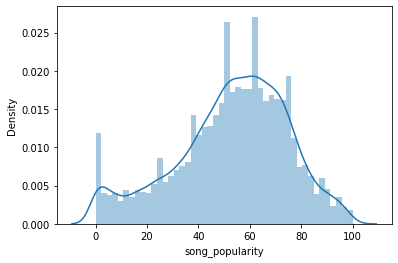


 58     404
52     389
55     388
60     383
63     378
      ... 
98      47
97      36
93      32
99      16
100     12
Name: song_popularity, Length: 101, dtype: int64


In [ ]:
# Distribution plot of song_popularity (target)
sns.distplot(song_data['song_popularity'], kde=True)
plt.show()

# The distribution of song_popularity appears to follow a normal distribution, with most songs having a score between 45 to 70.

print("\n", song_data['song_popularity'].value_counts())

**Feature engineering song_popularity**

For this project, the target variable song_popularity will be divided into 4 categories containing approximately the same number of songs each.

*   Below 25th percentile: unpopular
*   25th to 50th percentile: somewhat unpopular
*   50th to 75th percentile: somewhat popular
*   Above 75th percentile: popular

Based on song_data.describe(), the cut-off song_popularity for each category will be:

*   Unpopular: < 40
*   Somewhat unpopular: 40 to 55
*   Somewhat popular: 56 to 69
*   Popular: > 69

This project will aim to address a classification problem.
The subsequent prediction model will be based on the predicting which of the four categories the song will fall into.






In [ ]:
# Transform data in song_popularity column
# song_data['song_popularity'] = pd.cut(song_data['song_popularity'], bins=[0,39,55,69,100], labels=["Unpopular","Somewhat unpopular","Somewhat popular","Popular"])

song_data['song_popularity'] = pd.cut(song_data['song_popularity'], bins=[-1,39,55,69,101], labels=[0,1,2,3])

song_data['song_popularity'].value_counts(sort=False)

0    4490
1    4923
2    4971
3    4451
Name: song_popularity, dtype: int64

In [ ]:
song_data.head()

,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,3,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,2,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,3,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,2,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
# Change dtype from category to int64, in order to include it into the pairplot
song_data["song_popularity"] = song_data["song_popularity"].astype('int64')

# song_data.info()

**Analysis of Correlation Between Variables in song_data**

In [ ]:
# Pairplot
sns.pairplot(song_data)
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# Calculate pearson coefficient to check for linearity between pairs of features
song_data.corr()

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_popularity,1.000000,-0.002178,-0.083554,0.097796,0.020266,-0.148102,-0.014264,-0.040131,0.117404,-0.006202,0.014748,-0.017573,0.033711,-0.040256
song_duration_ms,-0.002178,1.000000,-0.097882,-0.104985,0.092688,-0.015188,-0.004615,0.016086,0.016469,-0.026328,-0.083447,0.012791,0.000264,-0.063421
acousticness,-0.083554,-0.097882,1.000000,-0.182500,-0.662639,0.173098,-0.002025,-0.082537,-0.557744,0.064100,-0.093574,-0.136421,-0.157177,-0.121670
danceability,0.097796,-0.104985,-0.182500,1.000000,0.044373,-0.130483,0.007723,-0.090694,0.177639,-0.106539,0.213728,-0.121286,0.136391,0.332014
energy,0.020266,0.092688,-0.662639,0.044373,1.000000,-0.205914,0.020416,0.167143,0.755516,-0.051605,0.062053,0.162448,0.146265,0.316742
instrumentalness,-0.148102,-0.015188,0.173098,-0.130483,-0.205914,1.000000,-0.009463,-0.032887,-0.390248,-0.014983,-0.081138,-0.036934,-0.069181,-0.178570
key,-0.014264,-0.004615,-0.002025,0.007723,0.020416,-0.009463,1.000000,-0.008193,0.010452,-0.169848,0.033639,0.003239,-0.008282,0.025356
liveness,-0.040131,0.016086,-0.082537,-0.090694,0.167143,-0.032887,-0.008193,1.000000,0.102450,-0.001035,0.090845,0.031876,0.013289,0.013789
loudness,0.117404,0.016469,-0.557744,0.177639,0.755516,-0.390248,0.010452,0.102450,1.000000,-0.058506,0.078164,0.129938,0.119241,0.199696
audio_mode,-0.006202,-0.026328,0.064100,-0.106539,-0.051605,-0.014983,-0.169848,-0.001035,-0.058506,1.000000,-0.111627,0.020448,-0.024042,-0.004558


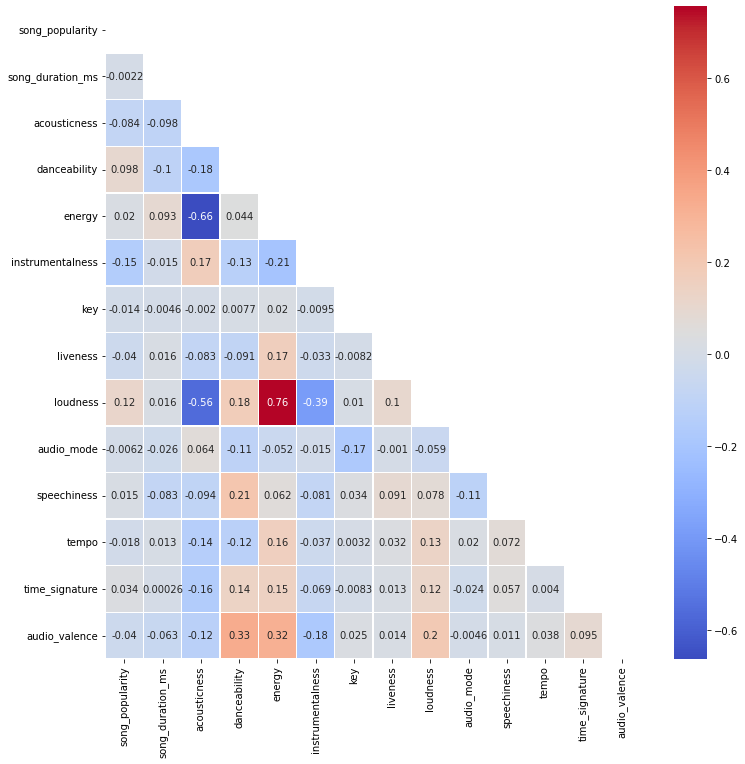

In [ ]:
# Plot song_data.corr() into a heatmap to easily identify pairs with stronger correlations

f,ax = plt.subplots(figsize=(12, 12))
mask = np.zeros_like(song_data.corr())
mask[np.triu_indices_from(mask)] = True

sns.heatmap(song_data.corr(), annot=True,linewidths=0.4,ax=ax,cmap="coolwarm",mask=mask)
plt.show() 

***Analysis of the pair plot & heat map for correlations***

By observing the pairplot of the different features in song_data, most plots generally looks diffused without any obivious pattern. The heatmap based on the pearson coefficient supports this, where most pairs are have a low value close to zero. This suggests that there is no distinct relationship between those features.

Despite that, there are some pairs of features displayed linear correlation.

*   Loudness vs Energy: 0.76 (strong positive correlation)
*   Energy vs Acousticness: -0.66 (moderate negative correlation)
*   Loudness vs Acousticness: -0.56 (moderate negative correlation)
*   Loudness vs Instrumentalness: -0.39 (weak negative correlation)
*   Audio_valence vs Danceability: 0.33 (weak positive correlation)
*   Audio_valence vs Energy: 0.32 (weak positive correlation)

While *Loudness* and *Energy* have a fairly strong postive correlation (0.76), their strength of correlation with other features are different. Therefore, these two features are still deemed to be fairly distinct and will not be merged. 

*Song_popularity* is most linearly correlated with instrumentalness (-0.15), and loudness (0.12). However, the strength of correlation is very weak. Apart from that, when comparing *song_popularity* with all other features, there is close to no linear correlation found as their respective correlation values are generally close to 0. Based on this, it is not yet possible to accurately determine which feature(s) are more 'important' in predicting the song popularity. Hence, all features will still be kept.


## Exploration of song_info

In [ ]:
# Examining the data from song_info.csv

song_info.head()

,song_name,artist_name,album_names,playlist
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems


In [ ]:
print('***Check shape / sample size:')
print(song_info.shape)

print('\n***Check for missing values:')
print(song_info.info())

***Check shape / sample size:
(18835, 4)

***Check for missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   song_name    18835 non-null  object
 1   artist_name  18835 non-null  object
 2   album_names  18835 non-null  object
 3   playlist     18835 non-null  object
dtypes: object(4)
memory usage: 588.7+ KB
None



**song_info** dataset:
*   18835 rows
*   4 columns
*   *No empty values/cells - further data cleaning not needed*
*   Contains information on relating to the ownership of the song (eg. artist name & albumn name) and the Spotify playlist the song is in.


**Features:**

*   artist_name
*   albumn_names
*   playlist

All features are categorical in nature. As there are thousands of unique artists (7564) & albumns (12014), it will not be feasible to include all of them into the prediction model. 

Instead, these columns will be re-engineered to contain a binary value based on whether the artist/albumn/playlist is among the top (eg. If among the top 200 artists = 1, otherwise = 0). More information on this discussed below. 


In [ ]:
print("Number of Unique artists:")
print(song_info['artist_name'].nunique())

print("\nNumber of unique albums:")
print(song_info['album_names'].nunique())

print("\nNumber of unique playlists:")
print(song_info['playlist'].nunique())

Number of Unique artists:
7564

Number of unique albums:
12014

Number of unique playlists:
300


## Combining song_info and song_data

In [ ]:
song_info_data = pd.concat([song_info, song_data],axis=1)
song_info_data.head()

,song_name,artist_name,album_names,playlist,song_name,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,Boulevard of Broken Dreams,3,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems,In The End,2,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,Seven Nation Army,3,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,By The Way,3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems,How You Remind Me,2,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


In [ ]:
# Verify that song_name (1st Column) and song_name (5th Column) are identical
song_info_data.iloc[:,0].equals(song_info_data.iloc[:,4])

# Based on the result, both columns are identical - hence, can proceed to remove one of the duplicate columns

True

In [ ]:
# Remove duplicate song_name column
song_info_data = song_info_data.loc[:,~song_info_data.columns.duplicated()]

song_info_data.head()

,song_name,artist_name,album_names,playlist,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,Green Day,Greatest Hits: God's Favorite Band,00s Rock Anthems,3,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,Linkin Park,Hybrid Theory,00s Rock Anthems,2,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,The White Stripes,Elephant,00s Rock Anthems,3,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,Red Hot Chili Peppers,By The Way (Deluxe Version),00s Rock Anthems,3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,Nickelback,Silver Side Up,00s Rock Anthems,2,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


## Feature Engineering - Top Artists / Albumns / Playlists

This project will attempt to identify if whether being a top artist / album / playlist affects popularity.
* Top 200 artists
* Top 600 albumns
* Top 40 playlists

Each of these variables will form a column containing values: 0 = No, 1 = Yes.

The above values are determined such that approximately 20% of each feature will be Yes (1).

In [ ]:
# Filter based on songs that are "Popular" or "Somewhat Popular"
song_info_data_popular = song_info_data[song_info_data["song_popularity"] >= 2]

In [ ]:
print("Number of Unique artists:")
print(song_info_data_popular['artist_name'].nunique())

print("\nNumber of unique albums:")
print(song_info_data_popular['album_names'].nunique())

print("\nNumber of unique playlists:")
print(song_info_data_popular['playlist'].nunique())

Number of Unique artists:
3114

Number of unique albums:
5132

Number of unique playlists:
288


In [ ]:
# Top 200 Artists among Popular / Somewhat Popular songs
top_200_artists = song_info_data_popular['artist_name'].value_counts().head(200)
print(top_200_artists.head(10), "\n")

# If among the top 200 artists, set value to 1. Otherwise, set to 0.
song_info_data["artist_name"] = [ 1 if (i in top_200_artists) else 0 for i in song_info_data.artist_name ]
song_info_data["artist_name"].value_counts()

Kanye West          72
Drake               53
Lady Gaga           47
6ix9ine             45
Eminem              41
David Guetta        36
Lil Baby            35
Lil Wayne           35
The Chainsmokers    35
Calvin Harris       35
Name: artist_name, dtype: int64 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    14988
1     3847
Name: artist_name, dtype: int64

In [ ]:
# Top 600 Albumns among Popular / Somewhat Popular songs
top_600_albumns = song_info_data_popular['album_names'].value_counts().head(600)
print(top_600_albumns.head(10), "\n")

# If among the top 500 albumns, set value to 1. Otherwise, set to 0.
song_info_data["album_names"] = [ 1 if (i in top_600_albumns) else 0 for i in song_info_data.album_names ]
song_info_data["album_names"].value_counts()

Scorpion                                  35
ASTROWORLD                                30
Tha Carter V                              29
Spotify Singles                           27
Kamikaze                                  21
I Love It                                 21
Greatest Hits                             20
Invasion of Privacy                       19
FEFE (feat. Nicki Minaj & Murda Beatz)    19
East Atlanta Love Letter                  18
Name: album_names, dtype: int64 



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0    15156
1     3679
Name: album_names, dtype: int64

In [ ]:
# Top 40 Playlists among Popular / Somewhat Popular songs
top_40_playlists = song_info_data_popular['playlist'].value_counts().head(40)
print(top_40_playlists.head(10), "\n")

# If among the top 40 playlists, set value to 1. Otherwise, set to 0.
song_info_data["playlist"] = [ 1 if (i in top_40_playlists) else 0 for i in song_info_data.playlist ]
song_info_data["playlist"].value_counts()

Get Turnt                   90
70s Rock Anthems            88
Piano in the Background     88
Signed XOXO                 88
Acoustic Covers             86
Have a Great Day!           83
Soft Pop Hits               80
80s Rock Anthems            79
Songs to Sing in the Car    78
All Out 80s                 78
Name: playlist, dtype: int64 



0    15176
1     3659
Name: playlist, dtype: int64

In [ ]:
# Rename columns
song_info_data.rename(columns = {'artist_name':'top_200_artists', 'album_names':'top_600_albumns', 'playlist':'top_40_playlists'}, inplace = True)

In [ ]:
song_info_data.head(10)

,song_name,top_200_artists,top_600_albumns,top_40_playlists,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,Boulevard of Broken Dreams,1,0,0,3,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,In The End,0,0,0,2,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,Seven Nation Army,0,0,0,3,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,By The Way,1,1,0,3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,How You Remind Me,0,0,0,2,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
5,Bring Me To Life,0,0,0,3,235893,0.008950,0.316,0.945,0.000002,4,0.3960,-3.169,0,0.1240,189.931,4,0.320
6,Last Resort,1,0,0,3,199893,0.000504,0.581,0.887,0.001110,4,0.2680,-3.659,0,0.0624,90.578,4,0.724
7,Are You Gonna Be My Girl,0,1,0,3,213800,0.001480,0.613,0.953,0.000582,2,0.1520,-3.435,1,0.0855,105.046,4,0.537
8,Mr. Brightside,0,1,0,3,222586,0.001080,0.330,0.936,0.000000,1,0.0926,-3.660,1,0.0917,148.112,4,0.234
9,Sex on Fire,1,1,0,3,203346,0.001720,0.542,0.905,0.010400,9,0.1360,-5.653,1,0.0540,153.398,4,0.374


In [ ]:
song_info_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         18835 non-null  object 
 1   top_200_artists   18835 non-null  int64  
 2   top_600_albumns   18835 non-null  int64  
 3   top_40_playlists  18835 non-null  int64  
 4   song_popularity   18835 non-null  int64  
 5   song_duration_ms  18835 non-null  int64  
 6   acousticness      18835 non-null  float64
 7   danceability      18835 non-null  float64
 8   energy            18835 non-null  float64
 9   instrumentalness  18835 non-null  float64
 10  key               18835 non-null  int64  
 11  liveness          18835 non-null  float64
 12  loudness          18835 non-null  float64
 13  audio_mode        18835 non-null  int64  
 14  speechiness       18835 non-null  float64
 15  tempo             18835 non-null  float64
 16  time_signature    18835 non-null  int64 

## Preparing Data for Load into the Prediction Model

In [ ]:
song_combined = song_info_data.copy()

Remove "song_name" as it is more of an "index" and does not help with the model prediction:

In [ ]:
song_combined.drop(["song_name"],axis=1,inplace=True)
song_combined.head()

,top_200_artists,top_600_albumns,top_40_playlists,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
0,1,0,0,3,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
1,0,0,0,2,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
2,0,0,0,3,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
3,1,1,0,3,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
4,0,0,0,2,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574


**song_combined_Y :** containing the target values (song_popularity)

In [ ]:
# Target (Y-axis)
song_combined_Y = song_combined["song_popularity"].values

song_combined_Y

array([3, 2, 3, ..., 0, 1, 2])

In [ ]:
# type(song_combined_Y)
song_combined_Y.dtype

dtype('int64')

**song_combined_X :**  containing song features that will be used to predict song popularity

Categorical features will be one-hot-encoded using "get_dummies".

In [ ]:
# Features (X-axis)
song_combined_X = song_combined.drop(["song_popularity"],axis=1)

# Encode categorical features
song_combined_categorical = ['top_200_artists', 'top_600_albumns', 'top_40_playlists', 'key', 'audio_mode', 'time_signature']
song_combined_X = pd.get_dummies(song_combined_X, columns=song_combined_categorical)

song_combined_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   song_duration_ms    18835 non-null  int64  
 1   acousticness        18835 non-null  float64
 2   danceability        18835 non-null  float64
 3   energy              18835 non-null  float64
 4   instrumentalness    18835 non-null  float64
 5   liveness            18835 non-null  float64
 6   loudness            18835 non-null  float64
 7   speechiness         18835 non-null  float64
 8   tempo               18835 non-null  float64
 9   audio_valence       18835 non-null  float64
 10  top_200_artists_0   18835 non-null  uint8  
 11  top_200_artists_1   18835 non-null  uint8  
 12  top_600_albumns_0   18835 non-null  uint8  
 13  top_600_albumns_1   18835 non-null  uint8  
 14  top_40_playlists_0  18835 non-null  uint8  
 15  top_40_playlists_1  18835 non-null  uint8  
 16  key_

Emperically, studies generally show that models produce the best results when 70-80% of data are used for training, and the rest for testing.

For this project, I will first split the data into training and testing set in a ratio of 75% to 25%.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(song_combined_X, song_combined_Y, test_size=0.25, shuffle=True, random_state=18)
 
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

X_train:  (14126, 35)
X_test:  (4709, 35)
y_train:  (14126,)
y_test:  (4709,)


In [ ]:
print("Training Targets:")
print(pd.DataFrame(y_train).value_counts(sort=False))

print("\nTesting Targets:")
pd.DataFrame(y_test).value_counts(sort=False)

Training Targets:
0    3353
1    3742
2    3705
3    3326
dtype: int64

Testing Targets:


0    1137
1    1181
2    1266
3    1125
dtype: int64

## Predictive Modelling

*   Logistic regression
*   K-nearest neighbours
*   Naïve Bayes
*   Decision trees
*   SVM

### Defining functions

In [ ]:
from numpy import mean
from numpy import std

from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred, average='weighted'),
                      'recall': recall_score(y_true, y_pred, average='weighted'),
                      'f1': f1_score(y_true, y_pred, average='weighted')},
                      name=label)

# function to evaluate a model using cross-validation
def evaluate_model(model):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    train_test_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                    measure_error(y_test, y_test_pred, 'test')],
                                    axis=1)
    
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(cm)

    print(train_test_error, "\n")

    print(classification_report(y_test, y_test_pred), "\n")

    return disp.plot()

# plot curve
def plot_curve(title, ylabel, train_sizes, train_scores, validation_scores, ylim=None):
    plt.style.use('seaborn')
    plt.figure(figsize=(10,8))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)    
    plt.xlabel("Training size")
    plt.ylabel(ylabel)
    plt.plot(train_sizes, train_scores, 'o-', color="r",
             label="Training")
    plt.plot(train_sizes, validation_scores, 'o-', color="g",
             label="Validation")
    plt.legend(loc="best")


### *Logistic Regression*

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Note: multiclass classification
# Scaling is required for Logistic Regression
lr_clf = make_pipeline(
        StandardScaler(), 
        LogisticRegression(penalty='elasticnet', l1_ratio=0.35, C=1, solver='saga', max_iter=50, random_state=8)
        )

              train      test
accuracy   0.448251  0.435974
precision  0.451178  0.448194
recall     0.448251  0.435974
f1         0.431394  0.422725 

              precision    recall  f1-score   support

           0       0.36      0.27      0.30      1137
           1       0.35      0.61      0.45      1181
           2       0.45      0.24      0.31      1266
           3       0.64      0.65      0.65      1125

    accuracy                           0.44      4709
   macro avg       0.45      0.44      0.43      4709
weighted avg       0.45      0.44      0.42      4709
 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


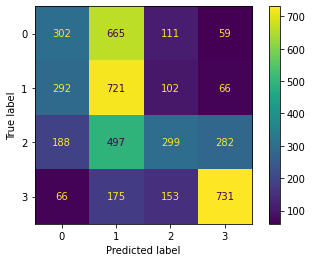

In [ ]:
evaluate_model(lr_clf)

The hyperparameters for LogisticRegression were obtained through experimenting with different hyperparemeters, and selecting the ones with the best result obtained for test accuracy.

Although the accuracy obtained from LogisticRegression does not seem very good (test accuracy = 0.436), this is better than random guess (1 of 4 options, 0.25 probability).

Based on the classification report, 3 (popular) had greater precision/recall compared to 0/1/2.

Subsequent data collection should focus on songs with popularity category of 0/1/2. 

Subsequent investigation is also needed to determine the reason for category 3 having better results as compared to the rest.

ROC curve does not apply here as it is mainly used for binary classification.

Based on the confusion matrix, the largest confusion occurs when predicting class 0 (unpopular) & class 2 (popular), and was often wrongly predicted to be in class 1 (somewhat unpopular).

Helps to narrow down on where to perform error analysis. Could be biased values, wrong input, etc.

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

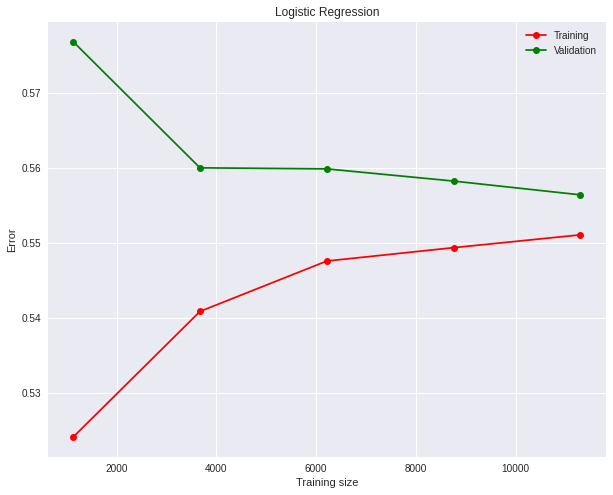

In [ ]:
# Learning curve

from sklearn.model_selection import learning_curve

train_sizes = train_sizes = np.linspace(0.1, 1.0, 5)

train_sizes, train_scores, validation_scores = learning_curve(
        lr_clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=train_sizes, shuffle=True, random_state=0)

train_errors_mean = 1. - np.mean(train_scores, axis=1)
validation_errors_mean = 1. - np.mean(validation_scores, axis=1)

plot_curve('Logistic Regression', 'Error', train_sizes, train_errors_mean, validation_errors_mean)


Variance is low, but bias is high - possibility of underfit.

To also experiment with other models that are more complex.

### *K-nearest Neighbours*

              train      test
accuracy   0.994407  0.480994
precision  0.994409  0.479163
recall     0.994407  0.480994
f1         0.994408  0.480032 

              precision    recall  f1-score   support

           0       0.39      0.38      0.39      1137
           1       0.40      0.39      0.40      1181
           2       0.46      0.46      0.46      1266
           3       0.68      0.69      0.68      1125

    accuracy                           0.48      4709
   macro avg       0.48      0.48      0.48      4709
weighted avg       0.48      0.48      0.48      4709
 



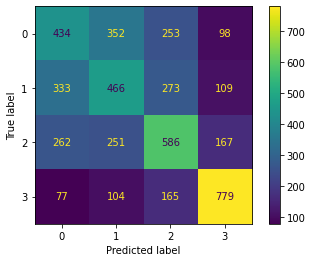

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Scaling needed for KNN

# Using k=1

knn_clf2 = make_pipeline(
        StandardScaler(), 
        KNeighborsClassifier(n_neighbors=1, leaf_size=10)
        )

evaluate_model(knn_clf2)

With k=1, training accuracy is very good with 99.4% accuracy. However the variance is also very large, with test accuracy only at 48.1%. This is due to overfitting of the model.

In order to reduce the variance and overfitting, k-value should be increased. To find a suitable k-value, plot a graph of accuracy vs k-value.

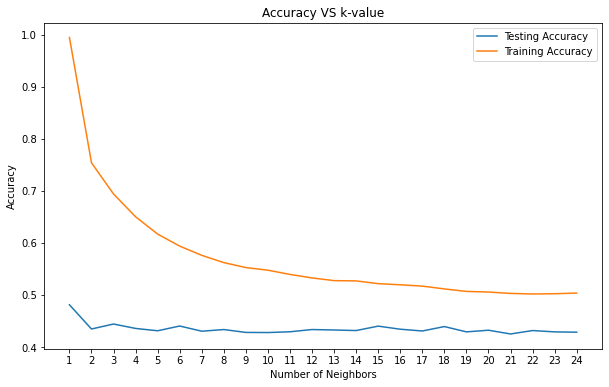

Best accuracy is 0.4809938415799533 with K = 1


In [ ]:
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k, leaf_size=10))
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

plt.figure(figsize=[10,6])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Accuracy VS k-value')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))

Based on the accuracy vs k-value plot, k=1 produces the most accurate result (test accuracy = 0.481). This means that picking the nearest neighbour (most similar) is best able to estimate the values of the target variable. However, picking a small k-value leaves the model susceptible to noise as well as overfitting, resulting in the high variance. Hence, k should be increased to reduce overfitting.

Based on the plot, k=15  gives a much lower variance, with an acceptable test accuracy.



In [ ]:
# using k=15
knn_clf1 = make_pipeline(
        StandardScaler(), 
        KNeighborsClassifier(n_neighbors=15, leaf_size=10)
        )

              train      test
accuracy   0.521591  0.440008
precision  0.524087  0.445780
recall     0.521591  0.440008
f1         0.521031  0.440888 

              precision    recall  f1-score   support

           0       0.37      0.40      0.38      1137
           1       0.38      0.45      0.41      1181
           2       0.39      0.32      0.35      1266
           3       0.65      0.60      0.63      1125

    accuracy                           0.44      4709
   macro avg       0.45      0.44      0.44      4709
weighted avg       0.45      0.44      0.44      4709
 



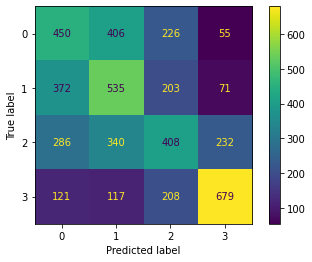

In [ ]:
evaluate_model(knn_clf1)

Despite that, the test accuracy did not improve much from Logistic Regression. Hence, a more complex model like SVM will be trialed.

Furthermore, using a higher k-value leads to longer computation time.

### *Support Vector Machine*

Based on testing of various combinations of C value & kernels, C=1 & kernel=rbf provides a decent test accuracy (0.452) with a lower variance.

              train      test
accuracy   0.509132  0.452113
precision  0.525210  0.469848
recall     0.509132  0.452113
f1         0.496868  0.439796 

              precision    recall  f1-score   support

           0       0.41      0.28      0.33      1137
           1       0.36      0.65      0.46      1181
           2       0.47      0.26      0.34      1266
           3       0.65      0.64      0.64      1125

    accuracy                           0.45      4709
   macro avg       0.47      0.46      0.44      4709
weighted avg       0.47      0.45      0.44      4709
 



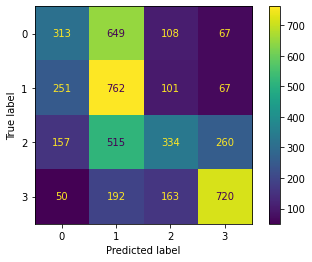

In [ ]:
from sklearn.svm import SVC

# Scaling is needed for SVM

svm_clf = make_pipeline(
        StandardScaler(), 
        SVC(kernel='rbf',C=1, random_state=8, probability=True)
        )

evaluate_model(svm_clf)

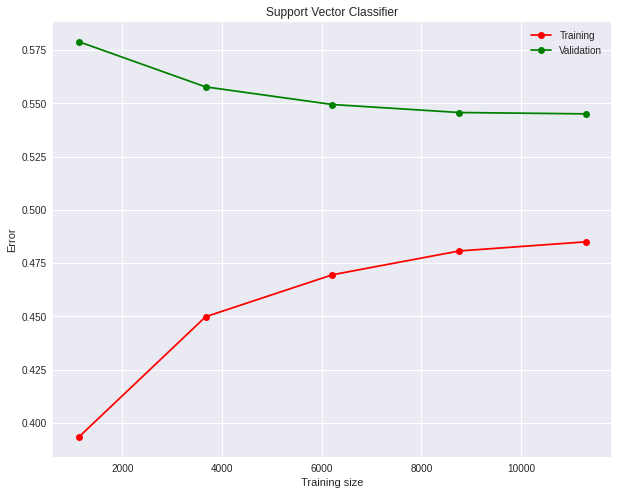

In [ ]:
# Learning curve
from sklearn.model_selection import learning_curve

train_sizes1 = np.linspace(0.1, 1.0, 5)

train_sizes1, train_scores1, validation_scores1 = learning_curve(
        svm_clf, X_train, y_train, cv=5, scoring='accuracy', train_sizes=train_sizes1, shuffle=True, random_state=0)

train_errors_mean1 = 1. - np.mean(train_scores1, axis=1)
validation_errors_mean1 = 1. - np.mean(validation_scores1, axis=1)

plot_curve('Support Vector Classifier', 'Error', train_sizes1, train_errors_mean1, validation_errors_mean1)

Based on the learning curve, increasing training size will probably not help much in lowering variance, as the training and validation curve are somewhat ‘flat’ already.

### *Naive Bayes*

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Scaling is not required for Naive Bayes as it is based on Probability instead of distance. 
# Hence it is not affected by feature scaling.

nb_clf = GaussianNB()

              train      test
accuracy   0.335056  0.344659
precision  0.343505  0.348673
recall     0.335056  0.344659
f1         0.287820  0.294257 

              precision    recall  f1-score   support

           0       0.34      0.20      0.25      1137
           1       0.35      0.40      0.37      1181
           2       0.36      0.06      0.11      1266
           3       0.34      0.76      0.47      1125

    accuracy                           0.34      4709
   macro avg       0.35      0.35      0.30      4709
weighted avg       0.35      0.34      0.29      4709
 



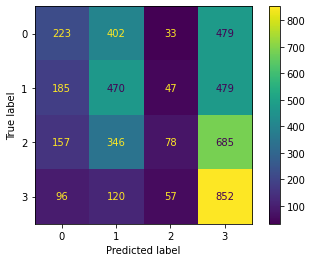

In [ ]:
evaluate_model(nb_clf)

Naive Bayes appears to perform poorly as compared to other earlier models. The model also tends to be biased towards category 3 (popular), depicted by a higher recall but much lower precision.

### *Decision Tree*

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(random_state=8)

              train      test
accuracy   0.994549  0.482268
precision  0.994564  0.481216
recall     0.994549  0.482268
f1         0.994548  0.481676 

              precision    recall  f1-score   support

           0       0.41      0.40      0.41      1137
           1       0.40      0.41      0.40      1181
           2       0.45      0.45      0.45      1266
           3       0.67      0.68      0.68      1125

    accuracy                           0.48      4709
   macro avg       0.48      0.48      0.48      4709
weighted avg       0.48      0.48      0.48      4709
 



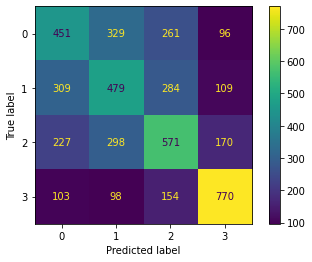

In [ ]:
evaluate_model(dt_clf)

The model produces improved results (test accuracy 48.2%). However, variance is very high, suggesting overfitting. 
This is likely due to a max_depth not being specified.

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'max_depth': list(range(10,60,10)), 'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

grid_search_cv = GridSearchCV(dt_clf, params, verbose=1, cv=3)

grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 1470 candidates, totalling 4410 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=8),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [ ]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=27, random_state=8)

Applying the best hyperparameters: max_depth=10, max_leaf_nodes=27

The variance has reduced significantly, but this has also led to a decrease in accuracy.

              train      test
accuracy   0.458233  0.437673
precision  0.490756  0.460280
recall     0.458233  0.437673
f1         0.419725  0.399801 

              precision    recall  f1-score   support

           0       0.42      0.12      0.18      1137
           1       0.35      0.76      0.48      1181
           2       0.46      0.24      0.31      1266
           3       0.62      0.66      0.64      1125

    accuracy                           0.44      4709
   macro avg       0.46      0.44      0.40      4709
weighted avg       0.46      0.44      0.40      4709
 



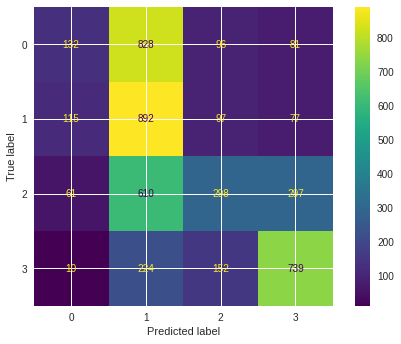

In [ ]:
dt_clf2 = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=27, random_state=8)

evaluate_model(dt_clf2)

To explore better models to reduce bias & improve accuracy, experiment using more complex ensemble methods.

## Ensemble Methods

*   Random forest
*   Ada Boost
*   Gradient Boost
*   Stacking
*   Hard & Soft Voting



### *Random Forest*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_enclf = RandomForestClassifier(random_state = 8)

              train      test
accuracy   0.994549  0.541304
precision  0.994549  0.551631
recall     0.994549  0.541304
f1         0.994549  0.543941 

              precision    recall  f1-score   support

           0       0.45      0.43      0.44      1137
           1       0.43      0.54      0.48      1181
           2       0.56      0.48      0.52      1266
           3       0.78      0.72      0.75      1125

    accuracy                           0.54      4709
   macro avg       0.55      0.54      0.55      4709
weighted avg       0.55      0.54      0.54      4709
 



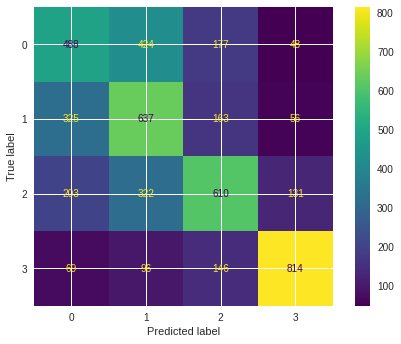

In [ ]:
evaluate_model(rf_enclf)

The random forest classifier produced the highest test accuracy (54.1%) so far. However, with the default parameters, the model is overfitting as observed from the large variance.

In [ ]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

rf_enclf_cv = GridSearchCV(estimator=rf_enclf, param_grid=param_grid, cv= 5)
rf_enclf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=8),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
rf_enclf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 500}

In applying the best parameters, the variance has improved sizably but test accuracy has also decreased significantly.

Notably, the model now tends to predict category 1 incorrectly, with a low precision score of 0.36.

              train      test
accuracy   0.524848  0.459758
precision  0.579755  0.498203
recall     0.524848  0.459758
f1         0.507848  0.432535 

              precision    recall  f1-score   support

           0       0.49      0.17      0.25      1137
           1       0.36      0.76      0.48      1181
           2       0.49      0.27      0.35      1266
           3       0.66      0.66      0.66      1125

    accuracy                           0.46      4709
   macro avg       0.50      0.46      0.44      4709
weighted avg       0.50      0.46      0.43      4709
 



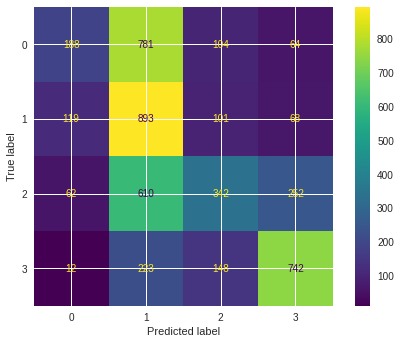

In [ ]:
rf_enclf2 = RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=500, random_state = 8)

evaluate_model(rf_enclf2)

### *AdaBoost*

              train      test
accuracy   0.448181  0.443831
precision  0.450930  0.454268
recall     0.448181  0.443831
f1         0.441160  0.439087 

              precision    recall  f1-score   support

           0       0.37      0.35      0.36      1137
           1       0.37      0.55      0.44      1181
           2       0.44      0.27      0.33      1266
           3       0.65      0.62      0.64      1125

    accuracy                           0.44      4709
   macro avg       0.46      0.45      0.44      4709
weighted avg       0.45      0.44      0.44      4709
 



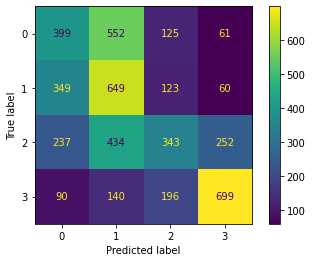

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_enclf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=8)

evaluate_model(ada_enclf)

### *GradientBoostingClassifier*

              train      test
accuracy   0.596206  0.473774
precision  0.605830  0.484942
recall     0.596206  0.473774
f1         0.593377  0.471360 

              precision    recall  f1-score   support

           0       0.42      0.34      0.38      1137
           1       0.38      0.57      0.46      1181
           2       0.46      0.34      0.40      1266
           3       0.69      0.65      0.67      1125

    accuracy                           0.47      4709
   macro avg       0.49      0.48      0.47      4709
weighted avg       0.48      0.47      0.47      4709
 



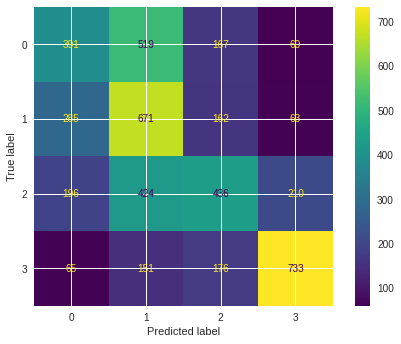

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_enclf = GradientBoostingClassifier(n_estimators=300, learning_rate=0.075, max_depth=3, random_state=8)

evaluate_model(gb_enclf)

### *Stacking*

In [ ]:
base_models = [
    ('lr', make_pipeline(
        StandardScaler(), 
        LogisticRegression(penalty='elasticnet', l1_ratio=0.35, C=1, solver='saga', max_iter=150, random_state=8)
        )),
    ('knn', make_pipeline(
        StandardScaler(), 
        KNeighborsClassifier(n_neighbors=15, leaf_size=10)
        )),
    ('svm', make_pipeline(
        StandardScaler(), 
        SVC(kernel='rbf',C=1, random_state=8, probability=True)
        )),
    ('dt', DecisionTreeClassifier(max_depth=10, max_leaf_nodes=27, random_state=8)),
    ('bayes', GaussianNB()),
    ('rf', RandomForestClassifier(criterion='gini', max_depth=8, max_features='auto', n_estimators=500, random_state = 8)),
    # # ('ada', AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=50, random_state=8)),
    # # ('gb', GradientBoostingClassifier(n_estimators=300, learning_rate=0.075, max_depth=3, random_state=8))
]

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import GradientBoostingClassifier

# base classifier
level0_enclf = base_models

# final meta-classifier
level1_enclf = StackingClassifier(estimators=level0_enclf, final_estimator=LogisticRegression())
# level1_enclf = StackingClassifier(estimators=level0_enclf, final_estimator=GradientBoostingClassifier())

In [ ]:
# Fit the training data based on results of level0_clf into the meta classifier
level1_enclf = level1_enclf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter

              train      test
accuracy   0.581198  0.480357
precision  0.601974  0.502542
recall     0.581198  0.480357
f1         0.581491  0.478521 

              precision    recall  f1-score   support

           0       0.43      0.34      0.38      1137
           1       0.38      0.61      0.47      1181
           2       0.50      0.34      0.40      1266
           3       0.71      0.63      0.67      1125

    accuracy                           0.48      4709
   macro avg       0.50      0.48      0.48      4709
weighted avg       0.50      0.48      0.48      4709
 



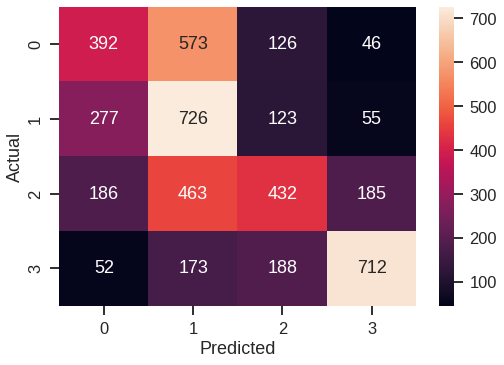

In [ ]:
y_train_pred = level1_enclf.predict(X_train)
y_test_pred = level1_enclf.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                                   measure_error(y_test, y_test_pred, 'test')],
                                   axis=1)
print(train_test_full_error, "\n")

print(classification_report(y_test, y_test_pred), "\n")

cm = confusion_matrix(y_test, y_test_pred)

sns.set_context('talk')
ax = sns.heatmap(cm, annot=True, fmt='d')
labels = ['0', '1', '2', '3']
ax.set_xticklabels(labels);
ax.set_yticklabels(labels);
ax.set_ylabel('Actual');
ax.set_xlabel('Predicted');

Takes long time to load - performance

Accuracy for Stacking classifiers higher than other base classifiers.

## Feature Importance

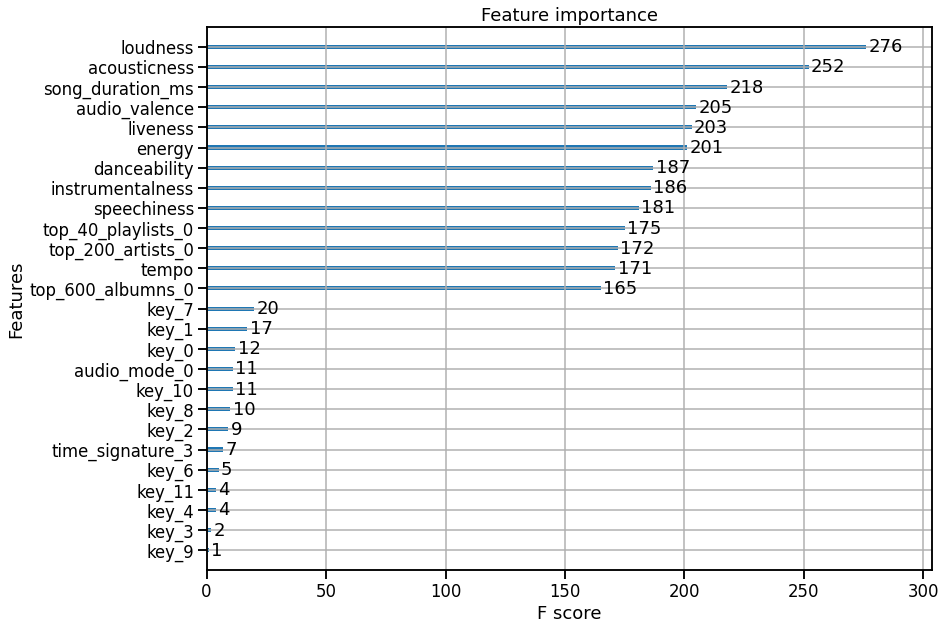

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance

model = XGBClassifier()
model.fit(X_train, y_train)

# plot feature importance
ax = plot_importance(model)
fig = ax.figure
fig.set_size_inches(13, 10)
#plot_importance(model)
plt.show()

In [ ]:
model_accuracy = pd.DataFrame({
    'Model':['Log Regression','KNN','SVM','Naive Bayes','Decision Tree','Random Forest','AdaBoost','GradientBoost','Stacking'],
    'Training Accuracy':[0.448,0.521,0.509,0.335,0.458,0.525,0.448,0.596,0.581],
    'Testing Accuracy':[0.436,0.440,0.452,0.345,0.438,0.460,0.444,0.474,0.480]
    })

sorted_model_accuracy = model_accuracy.sort_values(by = "Testing Accuracy",ascending=False)
sorted_model_accuracy

,Model,Training Accuracy,Testing Accuracy
8,Stacking,0.581,0.480
7,GradientBoost,0.596,0.474
5,Random Forest,0.525,0.460
2,SVM,0.509,0.452
6,AdaBoost,0.448,0.444
1,KNN,0.521,0.440
4,Decision Tree,0.458,0.438
0,Log Regression,0.448,0.436
3,Naive Bayes,0.335,0.345


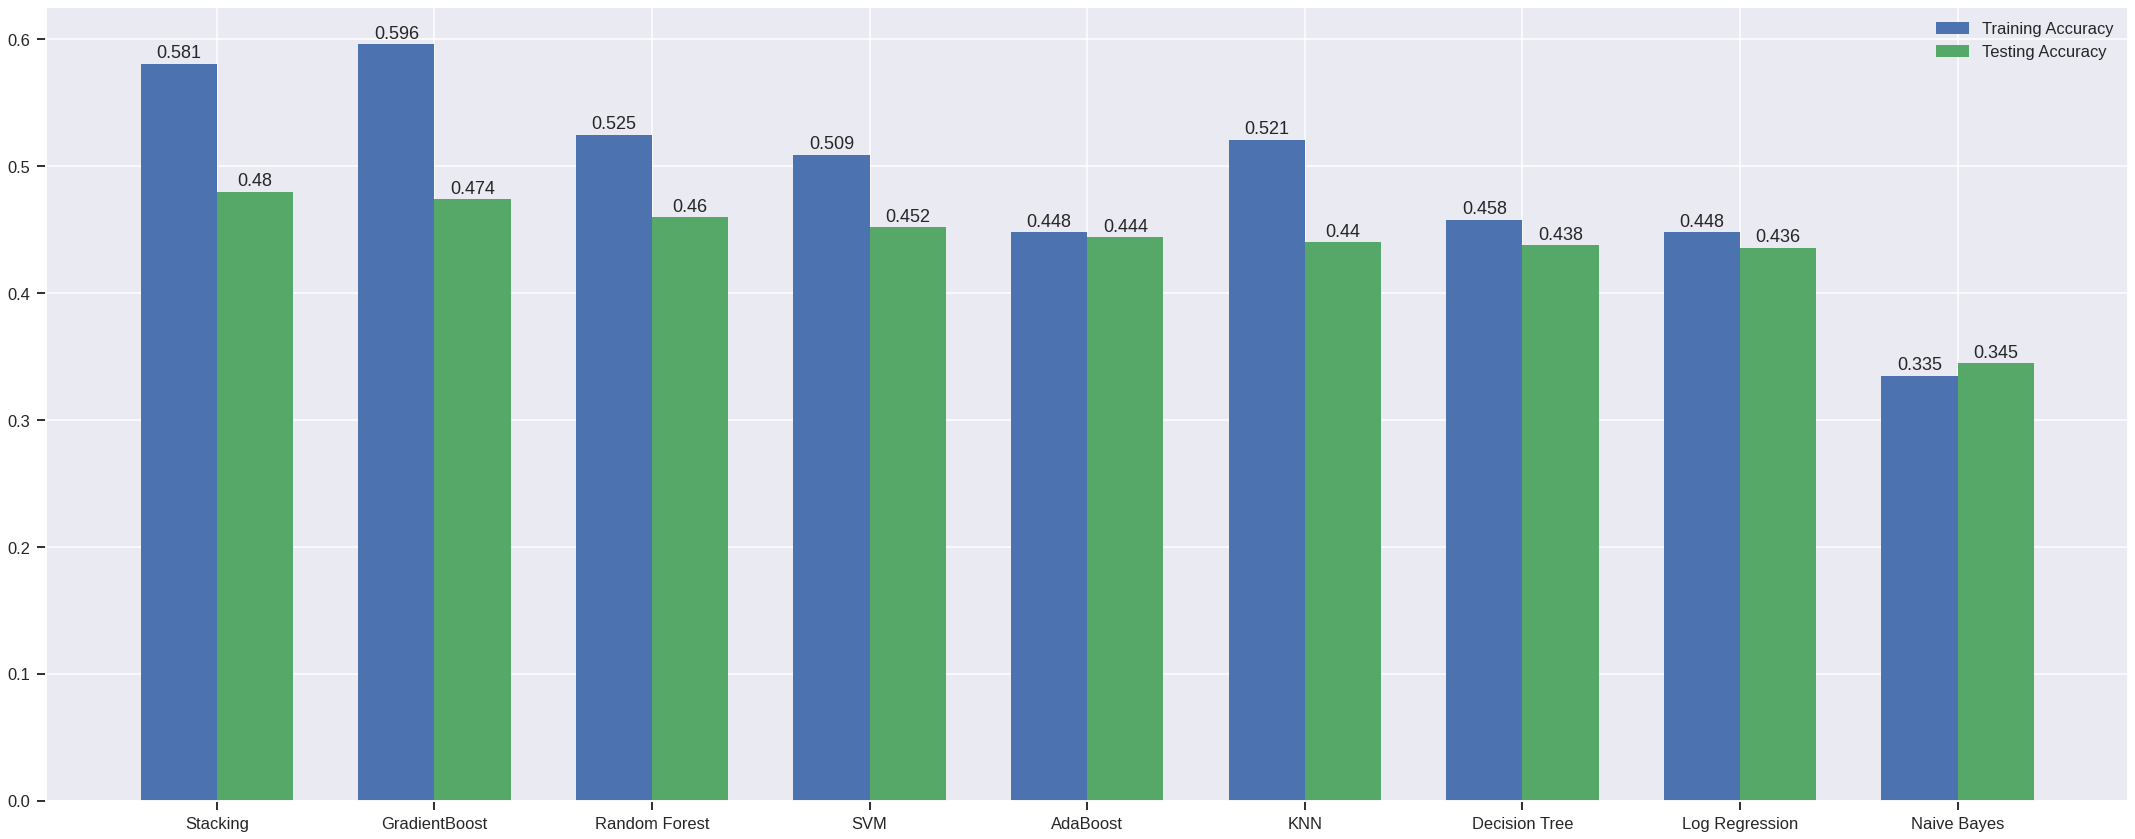

In [ ]:
label_models = list(sorted_model_accuracy['Model'])
label_train_accuracy = list(sorted_model_accuracy['Training Accuracy'])
label_test_accuracy = list(sorted_model_accuracy['Testing Accuracy'])

x = np.arange(len(label_models))
width = 0.35

fig, ax = plt.subplots(figsize=(30,12))
rects1 = ax.bar(x - width/2, label_train_accuracy, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, label_test_accuracy, width, label='Testing Accuracy')

ax.set_xticks(x)
ax.set_xticklabels(label_models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

## Conclusion

In this project, multi-label classification was attempted. The 'base' ensemble models generally performed better than the base models. This was expected as ensemble models makes use of and combines the predictions from multiple base models, allowing different models to cover for each other's weaknesses. Therefore,improving generalizability and robustness over a single model.

Across all the models, songs in Category 3 (popular) are the most accurately predicted, with higher precision, recall & F1 scores. 
However, other categories of songs 0, 1, 2 tend to be more poorly classified. Notably, many songs are misclassified to be under category 1. Therefore, further investigation is warranted to examine this. It is possible that the engineered features of "top 40 playlists", "top 200 artists" and  "top 600 albums" may have helped in better classifying popular songs  (song-popularity category 3).

For songs that are less popular (song-popularity categories 0,1,2), it appears that the songs from these classes have features or combination of features that are similar and therefore are often confused with each other. If needed, these features may be reengineered to or new features added (that may be unique to a certain class) to better differentiate between the popularity-category of songs. As a start, the features of higher importance (eg. loudness, acousticness) may be focused on and further examined to see if there may be significant differences between songs from various classes.

Adding of more data, especially for songs within categories 0,1,2 was considered. This may help in training the model better in these categories. However, the benefit for this may be limited, as increasing sample size may not impact or improve the bias significantly. The flattening trend of the learning curve also suggests that adding of more data may have limited benefit to accuracy.
